(information-theory)=
# Information theory

The current chapter describes tools and techniques drawn from the _theory of information_, which is a charming amalgamation of practical engineering and theoretical mathematics. This theory provides us with a method for measuring a particular form of _information_, but it also gives us techniques for quantifying related degrees of _surprise_, _uncertainty_, and _entropy_. In the upcoming chapters, our primary use for these measures will be to train and choose probabilistic models, but the theory reaches way beyond into physics, coding theory, computer science, neuroscience, biology, economics, the theory of complex systems, and many other fields.

Though it has its roots in engineering, our primary view on information theory is a mathematical one. For reasons of space and time, we cannot include or describe any of the many fascinating applications to coding theory and the like---for that, we will point the interested reader to one of the standard textbooks on information theory, like {cite}`CoverThomas2006`, {cite}`MacKay2003`, and {cite}`Ash2012`. Also, one can do little better than reading Claude Shannon's foundational paper {cite}`Shannon1948` in which information theory as a mathematical discipline was first described---though it is over three-quarters of a century old, it still reads amazingly well. The survey article {cite}`Rioul2021` is also an enlightening read.

In the first section of this chapter, we define and study the first two of the four central quantities in information theory called _Shannon information_ and _Shannon entropy_---after that, in the second section, we define the third quantity called _Kullback Leibler (KL) divergence_. It is mostly this latter quantity that will be of primary use in the following chapters, since it provides a generalized notion of "distance" between probability distributions. Finally, we end the chapter with the third section where we define and discuss the _mutual information_ shared between two random variables, which may be conceptualized as a generalized correlation measure that vanishes exactly when the variables are independent. This discussion is framed in the context of "flows" of "information" or "influence," foreshadowing the probabilistic models that we will study in depth in {numref}`Chapter %s <prob-models>`.


















## Shannon information and entropy

The whole story begins with a very simple definition:

```{prf:definition}
:label: info-content-def

Let $P$ be a probability measure on a finite sample space $S$ with mass function $p(s)$. The _(Shannon) information content_ of the sample point $s\in S$, denoted $I_P(s)$, is defined to be

$$
I_P(s) \def - \log(p(s)).
$$

The information content is also called the _surprisal_.

If the probability measure $P$ is clear from context, we will write $I(s)$ in place of $I_P(s)$. If $\bX$ is a random vector with finite range and probability measure $P_\bX$, we will write $I_\bX(\bx)$ in place of $I_{P_\bX}(\bx)$.
```

On one hand, a sense in which $I_P(s)$ may be considered a measure of "information" comes from its interpretation as the length of a code word, in the context of [Shannon-Fano coding](https://en.wikipedia.org/wiki/Shannon%E2%80%93Fano_coding). Another sense comes when we take the average information content of all sample points to obtain something called _Shannon entropy_; this will be explained after {prf:ref}`entropy-def` below.

On the other hand, the intuition for the alternate name _surprisal_ is explained very nicely by simply inspecting the graph of the negative logarithm function:

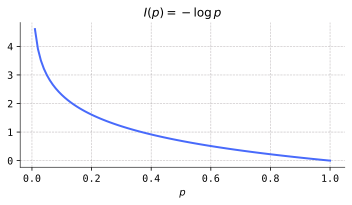

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.style.use('../aux-files/custom_style_light.mplstyle')
blue = '#486AFB'
magenta = '#FD46FC'

grid = np.linspace(0.01, 1, 100)
plt.plot(grid, -np.log(grid))
plt.xlabel('$p$')
plt.title('$I(p) = -\\log{p}$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

If some outcome is highly likely to occur (large $p(s)$), then it is not surprising (small $I(s)$). In the other direction, if an outcome $s$ is highly unlikely to occur (small $p(s)$), then it is very surprising (large $I(s)$).

It might occur that there are many functions that are equally capable of expressing this same inverse relationship between probability and surprisal---so why the choice of base-$e$ logarithm? It turns out that if you begin from first principles with a set of "natural axioms" that any notion of _surprisal_ should possess, then you can _prove_ all such surprisal functions must be proportional to negative logarithms; see, for example, the discussion in Section 9 in {cite}`Rioul2021`. The choice of base $e$ is then somewhat arbitrary, akin to choosing units. Another popular choice is base $2$, facilitating a smooth connection to bit strings in coding theory. (See the [homework](https://github.com/jmyers7/stats-book-materials/blob/main/homework/09-homework.md#problem-2-entropy-in-different-bases).) In base $e$, information content is measured in so-called _natural units_, or _nats_; in base $2$, it is measured in _binary units_, or _bits_. (See Section 10 in the aforementioned reference {cite}`Rioul2021` for more on units.)

Please understand that the terminology _information content_ now has a very specific and precise mathematical meaning. It is designed to "get at" our intuitive understanding of what general "information" is, but you should keep the two separate in your mind: There's the notion of "information" used in an intuitive and colloquial sense and is generally ill-defined, and then there is the notion of _information content_ precisely defined as above.

With the information content (or surprisal) in hand, we now define _entropy_:

```{prf:definition}
:label: entropy-def

Let $P$ be a probability measure on a finite sample space $S$ with mass function $p(s)$. The _(Shannon) entropy_ of $P$, denoted $H(P)$, is defined to be

$$
H(P) \def \sum_{s\in S} p(s)I_P(s).
$$

The entropy is also called the _uncertainty_.

If $\bX$ is a random vector with finite range and probability measure $P_\bX$, we will write $H(\bX)$ in place of $H(P_\bX)$. If we write the vector in terms of its component random variables $\bX = (X_1,\ldots,X_m)$, then we shall also write $H(X_1,\ldots,X_m)$ in place of $H(P_\bX)$ and call this the _joint entropy_ of the random variables $X_1,\ldots,X_m$.
```

There is a notion of _entropy_ for continuous probability measures defined on Euclidean spaces---this latter type of entropy is called _differential entropy_, which you will briefly encounter in the [homework](https://github.com/jmyers7/stats-book-materials/blob/main/homework/09-homework.md#problem-5-differential-entropy).

Since $I(s) = -\log(p(s))$, there is an issue in the definition of $H(P)$ in the case that $p(s)=0$ for some $s\in S$, for then we encounter the indeterminate form $0 \log(0)$. By convention, we take this expression to equal $0$, which may be justified according to the limit

$$
\lim_{p \to 0^+} p \log(p) = 0.
$$

In particular, when the probability distribution $P$ is a so-called _Dirac distribution_ that puts a spike of probability $1$ on a single sample point and assigns $0$ probability elsewhere, the entropy is at the minimum value $H(P)=0$. As we will see below (in {prf:ref}`max-entropy-thm`), at the other end of the spectrum are the maximum-entropy uniform distributions:

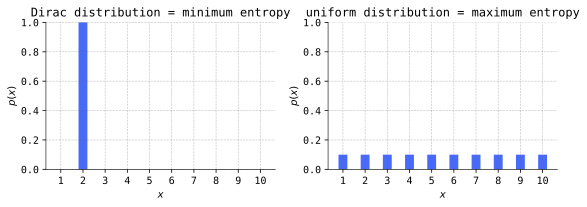

In [2]:
grid = range(1, 11)
spike = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
uniform = [0.1] * 10

_, axes = plt.subplots(ncols=2, figsize=(8, 3), sharex=True)

axes[0].bar(grid, spike, width=0.4)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$p(x)$')
axes[0].set_xticks(range(1, 11))
axes[0].set_ylim(0, 1)
axes[0].set_title('Dirac distribution = minimum entropy')
axes[1].bar(grid, uniform, width=0.4)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$p(x)$')
axes[1].set_ylim(0, 1)
axes[1].set_title('uniform distribution = maximum entropy')
plt.tight_layout()

The fact that these two types of distributions yield the extreme values of entropy helps explain the alternate name _uncertainty_. Indeed, imagine drawing a random sample from one of these two distributions---which one has the most uncertain outcome? Which one is most certain?

Notice that the entropy is the average information content, or surprisal, where the averaging weights are drawn from the mass function $p(s)$. Since averages of this form will reoccur so often in the current and next few chapters, it will be convenient to introduce new notations for them. So, if $P$ is a discrete probability measure with mass function $p(s)$ on a sample space $S$ and $g:S\to \bbr$ is a real-valued function, we will define

$$
E_P\left[g(s)\right] \def \sum_{s\in S} g(s) p(s).
$$

Alternatively, if we want to explicitly call attention to the mass function $p(s)$ rather than the probability measure $P$ itself, we will write

$$
E_{s\sim p(s)}\left[g(s)\right] \def \sum_{s\in S} g(s) p(s).
$$

We refer to these sums as the _mean value_ or _expected value_ of $g(s)$. Note that these are legitimately new usages of the expectation symbol $E$, since there is no random variable given _a priori_. To see the connection with the previous usage of $E$ for a discrete random variable $X$ with mass function $p_X(x)$, suppose that $g:\bbr \to \bbr$ and note

$$
E_{P_X}\left[g(x)\right] = \sum_{x\in \bbr}g(x) p_X(x) = E\left[g(X)\right].
$$

Indeed, the first equality follows from the definition of $E_{P_X}\left[g(x)\right]$ given above, while the second equality follows from the LotUS. Using this new notation, the definition of entropy may be rewritten as

$$
H(P) = E_P\left[I_P(s)\right] = E_{s\sim p(s)} \left[ I_P(s)\right].
$$

Since the entropy $H(P)$ is the average information content, it may sometimes be interpreted as a form of "information." To see why low (high) uncertainty might be interpreted as low (high) "information" content, imagine that you are to design a random experiment to help answer some question. Then, you certainly _do not_ want to arrange the conditions of the experiment so that the probabilities of the outcomes resemble the Dirac distribution above, with low uncertainty and one outcome practically all but guaranteed---this would convey little information! Instead, the ideal experiment would have the probabilities spread uniformly across all potential outcomes, so that any observed outcome is maximally informative. (For a very convincing and enlightening demonstration of this idea, see the description of the "weighing problem" in Section 4.1 of {cite}`MacKay2003`.)

Before moving on with the theory, let's take a look at some problems:

```{admonition} Problem Prompt
Do problems 1 and 2 on the worksheet.
```

Now comes a second type of entropy:

```{prf:definition}
:label: cross-entropy-def

Let $P$ and $Q$ be two probability measures on a finite sample space $S$ with mass functions $p(s)$ and $q(s)$. Suppose they satisfy the following condition:

* _Absolute continuity_. For all $s\in S$, if $q(s)=0$, then $p(s) = 0$. Or equivalently, the support of $q(s)$ contains the support of $p(s)$.

Then the _cross entropy_ from $P$ to $Q$, denoted $H_P(Q)$, is defined by

$$
H_P(Q) \def E_{s\sim p(s)}\left[ I_Q(s) \right] =  - \sum_{s\in S} p(s)\log(q(s)).
$$

As usual, if $P_\bX$ and $P_\bY$ are the probability measures of two random vectors $\bX$ and $\bY$ with finite ranges, we will write $H_\bY(\bX)$ in place of $H_{P_\bY} (P_\bX)$.
```

Notice that the condition of absolute continuity between the two measures guarantees we will never see an expression of the form $p \log(0)$, with $p \neq 0$. Thus, it is enough to make the cross entropy well-defined by stipulating that we take $0 \log(0) =0$, as explained above.

```{admonition} Problem Prompt

Do problem 3 on the worksheet.
```





(kl-div-sec)=
## Kullback Leibler divergence

Our aim in this section is to devise some sort of method for comparing the "distance" between two probability measures. The technique that we discover will have tight connections with the entropies studied in the previous section, but the first part of this section is largely independent of the previous. The link with entropy will come later.

The types of measures $P$ and $Q$ that we shall work with are ones defined on a finite probability space $S$, so that they have mass functions $p(s)$ and $q(s)$. (But see the comment immediately below {prf:ref}`KL-def`.) The basic measure that we use to compare them is the mean logarithmic relative magnitude. 

```{margin}

Of course, the two notions of _absolute relative magnitude_ and _logarithmic relative magnitude_ make sense for any pair of numbers, not necessarily probabilities.
```

Precisely, the _absolute relative magnitude_ of the probability $p(s)$ to the probability $q(s)$ ordinarily refers to the ratio $p(s)/q(s)$, while the _logarithmic relative magnitude_ refers to the base-$10$ logarithm of the absolute relative magnitude:

$$
\log_{10}\left( \frac{p(s)}{q(s)} \right).
$$

The intuition for this number is that it is the _order_ of the absolute relative magnitude; indeed, if we have $p(s) \approx 10^k$ and $q(s) \approx 10^l$, then the logarithmic relative magnitude is roughly the difference $k-l$.

Perhaps the most obvious immediate benefit of introducing the logarithm is that it yields a workable number when $p(s)$ and $q(s)$ are each on different scales. For example, let's suppose that the mass functions $p(s)$ and $q(s)$ are given by

$$
p(s) = \binom{10}{s} (0.4)^s(0.6)^{10-s} \quad \text{and} \quad q(s) = \binom{10}{s} (0.9)^s(0.1)^{10-s}
$$

for $s\in \{0,1,\ldots,10\}$; these are the mass functions of a $\Bin(10,0.4)$ and $\Bin(10,0.9)$ random variable, respectively. We then plot histograms for these mass functions, along with histograms of the absolute and logarithmic relative magnitudes:

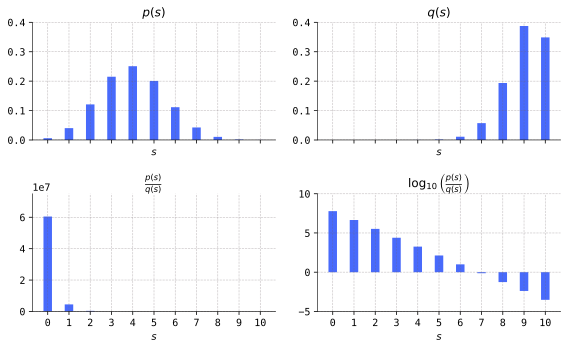

In [3]:
grid = np.arange(0, 11)
p = sp.stats.binom(n=10, p=0.4).pmf(grid)
q = sp.stats.binom(n=10, p=0.9).pmf(grid)
titles = ['$p(s)$',
          '$q(s)$',
          '$\\frac{p(s)}{q(s)}$',
          '$\\log_{10}\\left(\\frac{p(s)}{q(s)}\\right)$']
probs = [p,
         q,
         p / q,
         np.log10(p / q)]
ylims = [(0, 0.4),
         (0, 0.4),
         (-50, 0.75e8),
         (-5, 10)]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 5), sharex=True)

for title, prob, ylim, axis in zip(titles, probs, ylims, axes.flatten()):
    axis.bar(grid, prob, width=0.4)
    axis.set_xticks(ticks=grid)
    axis.set_ylim(ylim)
    axis.set_title(title)
    axis.set_xlabel('$s$')

plt.tight_layout()

The second row in the figure drives home the point: The absolute relative magnitudes are on such widely different scales that the plot is nearly useless and numerical computations in a machine will likely be unstable.

We obtain a single-number summary of the logarithmic relative magnitudes by averaging with weights drawn from the mass function $p(s)$; this yields the number

$$
\sum_{s\in S} p(s) \log_{10}\left( \frac{p(s)}{q(s)} \right).
$$ (first-kl-eq)

Observe that we could have drawn the averaging weights instead from the mass function $q(s)$ to obtain the single-number summary

$$
\sum_{s\in S} q(s) \log_{10}\left( \frac{p(s)}{q(s)} \right).
$$ (second-kl-eq)

But notice that

$$
\sum_{s\in S} q(s) \log_{10}\left( \frac{p(s)}{q(s)} \right) = - \sum_{s\in S} q(s) \log_{10}\left( \frac{q(s)}{p(s)} \right),
$$

where the right-hand side is the negative of a number of the form {eq}`first-kl-eq`. (I am **not** saying these two numbers are equal, merely that they have the same functional form!) So, at least up to sign, it doesn't really matter which of the two numbers {eq}`first-kl-eq` or {eq}`second-kl-eq` that we use to develop our theory. As we will see, our choice of {eq}`first-kl-eq` has the benefit of making the KL divergence nonnegative. Moreover, we can also alter the base of the logarithm in {eq}`first-kl-eq` without altering the core of the theory, since the change-of-base formula for logarithms tells us that the only difference is a multiplicative constant. In the following definition, we select the base-$e$ natural logarithm to make the link with entropy, though the base-$2$ binary logarithm is another common choice

```{prf:definition}
:label: KL-def

Let $P$ and $Q$ be two probability measures on a finite sample space $S$ with mass functions $p(s)$ and $q(s)$. Suppose they satisfy the following condition:

* _Absolute continuity_. For all $s\in S$, if $q(s)=0$, then $p(s) = 0$. Or equivalently, the support of $q(s)$ contains the support of $p(s)$.

Then the _Kullback-Leibler divergence_ (or just _KL divergence_) from $P$ to $Q$, denoted $D(P \parallel Q)$, is the mean logarithmic relative magnitude of $P$ to $Q$. Precisely, it is given by

$$
D(P \parallel Q) \def E_{s\sim p(s)} \left[ \log\left( \frac{p(s)}{q(s)} \right)\right] =  \sum_{s\in S} p(s) \log\left( \frac{p(s)}{q(s)} \right).
$$

The KL divergence is also called the _relative entropy_.

As always, if $P_\bX$ and $P_\bY$ are the probability measures of two random vectors $\bX$ and $\bY$ with finite ranges, we will write $D(\bY \parallel \bX)$ in place of $D(P_\bY \parallel P_\bX)$.
```

As with entropy, there is a notion of KL divergence for continuous probability measures on Euclidean spaces---it is called _differential KL divergence_, and you will encounter it briefly in the [homework](https://github.com/jmyers7/stats-book-materials/blob/main/homework/09-homework.md#problem-7-differential-kl-divergence).

```{admonition} Problem Prompt

To problem 4 on the worksheet.
```

The connection between KL divergence and entropy is given in the next theorem. Its proof is a triviality.

```{prf:theorem} KL divergence and entropy
:label: KL-and-entropy-thm

Let $P$ and $Q$ be two probability measures on a finite sample space $S$. Then

$$
D(P\parallel Q) = H_P(Q) - H(P).
$$
```

We now work towards proving _Gibb's inequality_, which is sometimes called the most important inequality in information theory. Its proof goes through a preliminary result known as _Jensen's inequality_ which, in turn, leverages the _concavity_ of the logarithm function $h(x) = \log{x}$. This latter term means that between any two points $x=a$ and $x=b$ along the $x$-axis, the graph of $h(x)$ lies below the secant line:

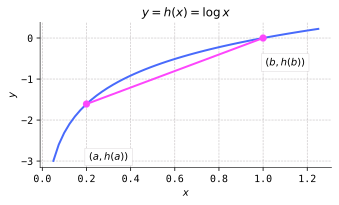

In [4]:
grid = np.linspace(0.05, 1.25)
grid_line = np.linspace(0.2, 1)
m = -np.log(0.2) / 0.8 

plt.plot(grid, np.log(grid))
plt.plot(grid_line, m * (grid_line - 1))
plt.scatter(0.2, np.log(0.2), s=50, color=magenta, zorder=2)
plt.scatter(1, 0, s=50, color=magenta, zorder=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$y=h(x) = \\log{x}$')
plt.gcf().set_size_inches(w=5, h=3)
plt.text(0.3, -2.9, '$(a,h(a))$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(1.1, -0.6, '$(b,h(b))$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.tight_layout()

Note that all $x$-values between the endpoints $x=a$ and $x=b$ are of the form

$$
x = (1-t) a + tb
$$

for some $t\in [0,1]$. Plugging this $x$-value into the function yields a point on the graph with $y$-value

$$
y = h\big((1-t) a + tb\big).
$$

On the other hand, as you may easily check, this same $x$-value yields a point on the secant line with $y$-value

$$
y = (1-t)h(a) + th(b).
$$

Thus, concavity of the function means that the inequality

$$
(1-t)h(a) + th(b) \leq h\big((1-t) a + tb\big)
$$ (convex-secant-eq)

holds for all $t\in [0,1]$. Note that since $h$ is _strictly concave_ (i.e., not linear), equality holds in {eq}`convex-secant-eq` if and only if $a=b$.

Now, note that the two scalars $1-t$ and $t$ appearing in {eq}`convex-secant-eq` are nonnegative and sum to $1$; thus, they define a probability measure on the sample space $S=\{a,b\}$, and we may rewrite {eq}`convex-secant-eq` as

$$
E_{s\sim p(s)}(h(s)) \leq h\big( E_{s\sim p(s)} (s) \big)
$$

where $p(a) = 1-t$ and $p(b) = t$. Jensen's inequality is nothing but a generalization of these observations to arbitrary concave functions and probability measures:

```{prf:theorem} Jensen's inequality
:label: jensen-thm

Suppose $h: \bbr\to \bbr$ is a concave function and $P$ is a probability measure on a finite subset $S\subset \bbr$ with mass function $p(s)$. Then

$$
E_{s\sim p(s)}(h(s)) \leq h\big( E_{s\sim p(s)} (s) \big).
$$

Provided $f$ is _strictly concave_, equality holds if and only if the sample space $S$ has cardinality $1$.
```

We will not give a proof of the full version of Jensen's inequality, hoping that the discussion before the statement at least conveys some intuition for why it is true. For a proof, see Section 2.6 in {cite}`CoverThomas2006`, for example.

We now put Jensen's inequality to use:

```{prf:theorem} Gibbs' inequality
:label: gibbs-thm

Let $P$ and $Q$ be two probability measures on a finite probability space $S$ satisfying the absolute continuity condition in {prf:ref}`KL-def`. Then

$$
D(P \parallel Q) \geq 0,
$$

with equality if and only if $P=Q$.
```

```{prf:proof}

Suppose that the support of the mass function $p(s)$ is $S_p = \{s_1,\ldots,s_n\}$. By absolute continuity, the support $S_q$ of the mass function $q(s)$ contains $S_p$, so that $S_p \subset S_q$. Now, define

$$
S' = \left\{ \frac{q(s_1)}{p(s_1)}, \frac{q(s_2)}{p(s_2)}, \ldots, \frac{q(s_n)}{p(s_n)}\right\},
$$

noting that none of the numbers in this set is $0$ since $S_p \subset S_q$. We may view $S'$ as a new sample space with $s'_k = q(s_k)/p(s_k)$ for each $k=1,\ldots,n$, equipped with a probability mass function $p(s')$ given by $p(s'_k) = p(s_k)$ for all $k$.

Since $h(x) = \log{x}$ is strictly concave, from Jensen's inequality ({prf:ref}`jensen-thm`) we have

$$
E_{s' \sim p(s')}\big( h(s') \big) \leq h \big( E_{s' \sim p(s')}(s') \big),
$$ (gibbs-target-eq)

with equality if and only if $S'$ has cardinality $1$. However, the left-hand side is

$$
E_{s' \sim p(s')}\big( h(s') \big) = \sum_{k=1}^n p(s'_k)\log{s'_k} = - \sum_{k=1}^n p(s_k) \log\left( \frac{p(s_k)}{q(s_k)} \right) = -D(P\parallel Q),
$$

while the right-hand side of {eq}`gibbs-target-eq` is

$$
h \big( E_{s' \sim p(s')}(s') \big) = \log \left( \sum_{k=1}^n p(s_k')s_k' \right) = \log \left( \sum_{k=1}^n q(s_k)\right) \leq 0. 
$$ (gibbs-target-2-eq)

Thus, $D(P \parallel Q) \geq 0$.

As we observed, equality holds if and only if $S'$ has cardinality $1$, in which case there is a positive constant $c$ such that $p_s(s_k) = cq(s_k)$ for each $k=1,\ldots,n$. But then

$$
1 = \sum_{k=1}^n p(s_k) = c \sum_{k=1}^n q(s_k).
$$

Note that the equality $D(P\parallel Q)=0$ also implies $\sum_{k=1}^n q(s_k) = 1$ from {eq}`gibbs-target-2-eq`, and so $c=1$. Since then $S_p = S_q$ as well, we've shown that $P=Q$. Q.E.D.
```

Gibbs' inequality provides the theoretical justification for viewing the KL divergence as a type of "distance" between two probability distributions. It has two properties that any "distance" must have: It is always nonnegative, and it vanishes only when the two distributions are the same. However, remember that it is _not_ symmetric in the distributions $P$ and $Q$, so the KL divergence falls short of being a true distance measure in the [precise, mathematical sense](https://en.wikipedia.org/wiki/Metric_space#Definition). It is better thought of as a "directed distance" function.

Gibbs' inequality has the following immediate corollary:

```{prf:corollary} Uniform distributions maximize entropy
:label: max-entropy-thm

Let $P$ be a probability measures on a finite sample space $S$. Then

$$
H(P) \leq \log{|S|},
$$

with equality if and only if $P$ is uniform.
```

```{prf:proof}
Let $Q$ be the uniform distribution on $S$, and let $p(s)$ and $q(s)$ be the mass functions of $P$ and $Q$, respectively. Then by Gibbs' inequality, we have

$$
0 \leq D(P \parallel Q) = H_P(Q) - H(P) = \sum_{s\in S} p(s) \log|S| - H(P) = \log|S| - H(P).
$$

The desired result then follows. Q.E.D.
```

So, when $P$ is uniform, we have $H(P) = \log|S|$. It is pleasing to compare this latter equation to the [Boltzmann equation](https://en.wikipedia.org/wiki/Boltzmann%27s_entropy_formula) for entropy in statistical mechanics. The defining equation for Shannon entropy

$$
H(P) = - \sum_{s\in S} p(s) \log(p(s))
$$

is the analog of the [Gibbs equation](https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)#Gibbs_entropy_formula) for Boltzmann entropy.

Let's finish off our discussion of KL divergence with:

```{admonition} Problem Prompt

Do problem 5 on the worksheet.
```





























(cond-entropy-mutual-info-sec)=
## Flow of information

In this section, we use the information-theoretic measures developed in the previous sections to quantify the amount of "information" shared between two random variables $X$ and $Y$, or the amount of "influence" that they exert on each other. (As in the rest of this chapter, we shall restrict ourselves to random variables with finite ranges.) But to say that the random variables $X$ and $Y$ share information must mean that there is some sort of "communication channel" between them---how might we model such a channel?

As we mentioned at the beginning of {numref}`covar-correl-sec`, perhaps the cleanest way to transmit information from $X$ to $Y$ is via a _deterministic link_ between observed values. This would take the form of a function

$$
g: \bbr \to \bbr, \quad x \mapsto g(x),
$$

such that $Y=g(X)$. Then, an observation $x$ (of $X$) _uniquely_ determines an observation $y = g(x)$ (of $Y$). While these types of deterministic functional dependencies have their place in the theory (see {numref}`Chapter %s <prob-models>`, for instance), they are not the sort of communication channels of primary interest in information theory. Indeed, Shannon's main goal in the foundational paper {cite}`Shannon1948` was to quantify the transfer of information through imperfect "noisy" channels that introduce errors.

So, even though it is too much to ask that an observation $x$ _uniquely_ determines an observation $y$, we still want to keep the general idea that $x$ is the information carrier that is transmitted through the channel toward $Y$. But when $x$ arrives at $Y$, it carries uncertainty with it, introduced by the "noise" in the channel. Uncertainty is modeled mathematically using probabilities, so what we are after is a notion of _communcation channel_ that sends $x$ to a probability distribution on the $y$'s. But this is _exactly_ what conditional distributions are meant to model, and so we are led to replace the deterministic link $x \mapsto g(x)$ from above with the mapping

$$
x \mapsto p(y | x)
$$ (markov-kern-eq)

that sends $x$ to the associated conditional distribution on the $y$'s. In contrast to the deterministic link, this might be called a _stochastic link_. It is a strange mapping, as its domain is a Euclidean space, but its codomain is a _set of probability measures_! It is an example of something called a general [Markov kernel](https://en.wikipedia.org/wiki/Markov_kernel). The contrast between the two types of links is depicted in:

```{image} ../img/markov-kern.svg
:width: 85%
:align: center
```
&nbsp;

We are led, then, to define a _communication channel_ as essentially a Markov kernel. But because students at this level might be uncomfortable with a mapping of the form {eq}`markov-kern-eq` that outputs entire probability distributions, we take advantage of the fact that our random variables have finite ranges and "choose bases" to reformulate an alternate definition in terms of matrices and vectors. So, if we suppose for simplicity that the ranges of $X$ and $Y$ have cardinalities $m$ and $n$, respectively, then the conditional distributions may be doubly indexed as $p(y_j | x_i)$, for $i=1,\ldots,m$ and $j=1,\ldots,n$. For ease of bookkeeping (and other reasons), it is natural to place these distributions into an $m\times n$ matrix

$$
\bK = [p(y_j |x _i)].
$$

Holding the row index $i$ fixed and summing over the columns, note that

$$
\sum_{j=1}^n p(y_j | x_i) = 1,
$$

since $p(y|x)$ is a probability mass function in the variable $y$ with $x$ held fixed. If we also represent the mass functions $p(x)$ and $p(y)$ as vectors

$$
\bpi(X)^\intercal = \begin{bmatrix} p(x_1) & \cdots & p(x_m) \end{bmatrix} \quad \text{and} \quad \bpi(Y)^\intercal = \begin{bmatrix} p(y_1) & \cdots & p(y_n) \end{bmatrix}
$$ (prob-vectors-eq)

then by the Law of Total Probability we have

$$
\bpi(X)^\intercal \bK = \bpi(Y)^\intercal.
$$

Notice that the entries in the vectors {eq}`prob-vectors-eq` sum to $1$. Vectors with nonnegative entries that sum to $1$ are called _probability vectors_.

With these preparations completed, we are ready to define (our version of) a _Markov kernel_ and a _communication channel_:

```{prf:definition}
:label: markov-kernel-def

A _Markov kernel_ is a mapping

$$
\kappa: \{1,2,\ldots,m\} \to \bbr^n
$$

such that each vector $\kappa(i)\in \bbr^n$ is a probability vector (i.e., a vector with nonnegative entries that sum to $1$). The $m\times n$ matrix

$$
\bK = \begin{bmatrix} \leftarrow & \kappa(1)^\intercal & \rightarrow \\ \vdots & \vdots & \vdots \\ \leftarrow & \kappa(m)^\intercal & \rightarrow \end{bmatrix}
$$

is called the _transition matrix_ of the Markov kernel.
```

Markov kernels occur in the theory of _Markov chains_, if you know what those are. In the context of information theory, Markov kernels become our models of communication channels:

```{prf:definition}
:label: comm-channel-def

A _communication channel_ is a Markov kernel.
```

Notice that there is no mention of the random variables $X$ and $Y$ in this definition. Indeed, this definition is meant only to isolate and capture the channel itself, whereas the random vectors $X$ and $Y$ are separate components that are conceptualized as the "sender" and "receiver" hooked to the two ends of the channel.

Our discussion preceding the definitions shows that every pair of random variables $(X,Y)$ (with finite ranges) determines a Markov kernel through the conditional distributions, and hence also a communication channel. Let's formally record this fact:

```{prf:theorem} Conditional distributions determine communication channels
:label: conditional-markov-kernel-thm

Let $X$ and $Y$ be two random variables with finite ranges

$$
\{x_1,\ldots,x_m\} \quad \text{and} \quad \{y_1,\ldots,y_n\}.
$$ (ranges-eq)

Then the matrix

$$
\bK = [p(y_j|x_i)] = \begin{bmatrix}
p(y_1|x_1) & \cdots & p(y_n|x_1) \\
\vdots & \ddots & \vdots \\
p(y_1|x_m) & \cdots & p(y_n|x_m)
\end{bmatrix}
$$ (trans-matrix-var-eq)

is the transition matrix of a Markov kernel.
```

Be sure to notice that the form of the transition matrix {eq}`trans-matrix-var-eq` depends on the enumerations of the ranges of $X$ and $Y$ in {eq}`ranges-eq`; if we change the numbering of the ranges, the transition matrix will change accordingly. For this reason, it is convenient to represent the transition matrices as tables like the following:

$$
\bK = \left\{\begin{array}{c|cc}
p(y|x) & y=0 & y=1 \\ \hline
x = 0 & 0.75 & 0.25 \\
x = 1 & 0.6 & 0.4
\end{array}\right\}.
$$

This is the transition matrix determined by two Bernoulli random variables $X$ and $Y$.

Notice that there is nothing special about the random variables in {prf:ref}`conditional-markov-kernel-thm`, besides that they have finite ranges. Indeed, _every_ conditional distribution determines a Markov kernel and thus a communication channel. This is just a new framework in which to conceptualize conditional distributions---they are the mechanism that one random variable uses to send "information" or exert "influence" on another.

```{admonition} Problem Prompt

Do Problem 6 on the worksheet.
```

The induced communication channel in {prf:ref}`conditional-markov-kernel-thm` has a directionality to it, from $X$ to $Y$. However, there is also the communication channel in the other direction, induced by the conditional distributions $p(x|y)$. The mathematical mechanism that allows us to reverse the direction of "flow" is exactly Bayes' theorem, since it states that

$$
p(x|y) = \frac{p(y|x)p(x)}{\sum_{x^\star \in \bbr} p(y|x^\star)p(x^\star)}.
$$

So, as long as we know the marginal mass functions $p(x)$ and $p(y)$, Bayes' theorem gives us a way to use one communication channel in one direction to obtain the other:

```{image} ../img/comm-bayes.svg
:width: 75%
:align: center
```
&nbsp;

We now seek a way to measure the amount of "information" that passes through a communication channel induced by a pair of random variables $X$ and $Y$ as in {prf:ref}`conditional-markov-kernel-thm`. Our identification of such a measure begins by studying the case in which it is natural to believe that _no_ information is passed, exactly when the communication channel is _constant_:

```{image} ../img/markov-kern-constant.svg
:width: 85%
:align: center
```
&nbsp;

But this turns out to have an interpretation in terms of a familiar previous concept:

```{prf:theorem} Independence $=$ constant Markov kernels
:label: ind-markov-thm

Let $X$ and $Y$ be two random variables with finite ranges

$$
\{x_1,\ldots,x_m\} \quad \text{and} \quad \{y_1,\ldots,y_n\}.
$$

Then the induced communication channel

$$
\kappa: \{1,2,\ldots,m\} \to \bbr^n, \quad \kappa(i)^\intercal = \begin{bmatrix} p(y_1|x_i) & \cdots & p(y_n|x_i) \end{bmatrix},
$$

is constant if and only if $X$ and $Y$ are independent. In this case, $\kappa(i) = \bpi(Y)$ for each $i=1,\ldots,m$.
```

```{prf:proof}

By the Conditional Criteria for Independence (see {prf:ref}`conditional-ind-rvs-thm`), we have that $X$ and $Y$ are independent if and only if $p(y|x) = p(y)$ for all $x$ and $y$. In particular, if $X$ and $Y$ are independent, then we must have $p(y_j|x_i) = p(y_j)$ for each $i$ and $j$, and so the transition matrix is of the form

$$
\bK = \begin{bmatrix} p(y_1) & \cdots & p(y_n) \\ \vdots & \ddots & \vdots \\ p(y_1) & \cdots & p(y_n) \end{bmatrix},
$$

showing that the Markov kernel is constant with $\kappa(i) = \bpi(Y)$ for each $i$. Conversely, if the Markov kernel is constant so that the transition matrix is of the form

$$
\bK = \begin{bmatrix}
p(y_1|x_1) & \cdots & p(y_n|x_1) \\
\vdots & \ddots & \vdots \\
p(y_1|x_m) & \cdots & p(y_n|x_m)
\end{bmatrix} = \begin{bmatrix} \leftarrow & \bc^\intercal & \rightarrow \\ \vdots & \vdots & \vdots \\ \leftarrow & \bc^\intercal & \rightarrow \end{bmatrix}
$$

for some $\bc = [c_j] \in \bbr^n$, then by the Law of Total Probability

$$
\bpi(Y)^\intercal = \bpi(X)^\intercal \bK ,
$$

we must have

$$
p(y_j) = \sum_{i=1}^m p(x_i)c_{j} = c_j \sum_{i=1}^m p(x_i) = c_j
$$

for each $j$. This shows $\bpi(Y) = \bc$, and so

$$
p(y_j) = c_j = p(y_j|x_i)
$$

for all $i$ and $j$. Thus, $X$ and $Y$ are independent. Q.E.D.
```

By the Mass/Density Criteria for Independence (see {prf:ref}`mass-density-ind-thm`), the induced communication channel in {prf:ref}`ind-markov-thm` is constant if and only if the joint mass function of $X$ and $Y$ factors into the marginals:

$$
p(x,y) = p(x)p(y),
$$

for all $x$ and $y$. This suggests that a measure of "information" passed from $X$ to $Y$ should be the degree to which the joint mass function _does not_ equal the product of the marginals. But we already have a method for measuring the discrepancy between two distributions! This motivates:


```{prf:definition}
:label: mutual-info-def

Let $X$ and $Y$ be two random variables with finite ranges. The _mutual information_ shared between $X$ and $Y$, denoted $I(X,Y)$, is the KL divergence

$$
I(X, Y) \def D( P_{XY} \parallel P_{X} \otimes P_{Y}) = \sum_{(x,y)\in \bbr^2} p(x,y) \log\left( \frac{p(x,y)}{p(x)p(y)}\right).
$$
```

The notation $P_X \otimes P_Y$ denotes the [_product measure_](https://en.wikipedia.org/wiki/Product_measure) on the Cartesian product of the ranges of $X$ and $Y$; by definition, this is the measure that has mass function given by

$$
p_{P_X \otimes P_Y}(x,y) \def p(x)p(y).
$$

When the marginal distributions $P_X$ and $P_Y$ are expressed in terms of probability vectors, then the product measure is realized as the [_outer product_](https://en.wikipedia.org/wiki/Outer_product) of the vectors, which is also called their [_tensor product_](https://en.wikipedia.org/wiki/Tensor_product) by some people (like me).

```{admonition} Problem Prompt

Do Problem 7 on the worksheet.
```

Note that the mutual information $I(X,Y)$ is always nonnegative, i.e.,

$$
I(X,Y) \geq 0.
$$ (mutual-ineq-eq)

This is because mutual information is a KL divergence, and Gibbs' inequality therefore applies (see {prf:ref}`gibbs-thm`). As a sanity check, let's make sure that equality holds in {eq}`mutual-ineq-eq` when (and only when) the communication channel carries no "information":

```{prf:theorem} Independence $=$ zero mutual information
:label: info-independence-thm

Let $X$ and $Y$ be two random variables with finite ranges

$$
\{x_1,\ldots,x_m\} \quad \text{and} \quad \{y_1,\ldots,y_n\}.
$$

Then the following statements are equivalent:

1. The induced communication channel

    $$
    \kappa: \{1,2,\ldots,m\} \to \bbr^n, \quad \kappa(i)^\intercal = \begin{bmatrix} p(y_1|x_i) & \cdots & p(y_n|x_i) \end{bmatrix},
    $$

    is constant.

2. The random variables $X$ and $Y$ are independent.

3. The mutual information $I(X,Y) =0$.
```

```{prf:proof}

The equivalence of the first two statements is exactly {prf:ref}`ind-markov-thm`. The equivalence of the second and third follows from the Mass/Density Criteria for Independence (see {prf:ref}`mass-density-ind-thm`) and {prf:ref}`gibbs-thm`. Q.E.D.
```

The mutual information between two random variables is _defined_ to be a particular KL divergence, which links it up with one of the information-theoretic quantities from the previous sections. But it _also_ can be expressed in terms of marginal and joint entropies:

```{prf:theorem} Mutual information and entropy
:label: other-info-thm

Let $X$ and $Y$ be two random variables with finite ranges. Then:

$$
I(X,Y) = H(X) + H(Y) - H(X,Y).
$$
```

```{prf:proof}

The proof is a computation:

\begin{align*}
I(x,y) &= \sum_{x\in \bbr}\sum_{y \in \bbr} p(x,y) \log\left( \frac{p(x,y)}{p(x)p(y)} \right) \\
&= - \sum_{x\in \bbr}\sum_{y \in \bbr} p(x,y) \log \left(p(x)\right) - \sum_{x\in \bbr}\sum_{y \in \bbr} p(x,y) \log\left(p(y)\right) \\
&\quad + \sum_{x\in \bbr}\sum_{y \in \bbr} p(x,y) \log\left(p(x,y)\right)  \\
&= - \sum_{x \in \bbr} p(x) \log\left( p(x) \right) - \sum_{y \in \bbr} p(y) \log\left( p(y)\right) - H(X,Y)  \\
&= H(X) + H(Y) - H(X, Y),
\end{align*}

as desired. Q.E.D.
```



Since the joint entropy $H(X,Y)$ is symmetric in the random variables $X$ and $Y$, i.e., $H(X,Y) = H(Y,X)$, we get the following corollary:

```{prf:corollary} Symmetry of mutual information
:label: symm-info-thm

Let $X$ and $Y$ be random variables with finite ranges. Then $I(X,Y) = I(Y,X)$.
```

We end this section by stating a fundamental inequality that provides further evidence that the abstract notion of _mutual information_ accords with our intuition for transfer or flow of "information" or "influence." Indeed, suppose that we have a triple of random variables $X$, $Y$, and $Z$, and that we consider the "flows" going from one to the other in that order:

```{margin}
This is a very simple example of a _probabilistic graphical model_ that we will study in more detail in {numref}`Chapter %s <prob-models>`.
```

```{image} ../img/markov.svg
:width: 40%
:align: center
```
&nbsp;

For a concrete running example, suppose we consider testing for the fictional(!) disease _hydromechanical trepidation syndrome_ (or _HTS_) that we met back in the [programming assignment](https://github.com/jmyers7/stats-book-materials/blob/main/programming-assignments/assignment_03.ipynb) for {numref}`Chapter %s <rules-prob>`. Suppose $X$ and $Y$ are (Bernoulli) indicator variables for the presence of the disease and the result of the test:

$$
X = \left\{\begin{array}{cl}
0 & : \text{do not have disease} \\
1 & : \text{have disease}
\end{array}\right\} \quad\quad \text{and} \quad\quad Y = \left\{\begin{array}{cl}
0 & : \text{test negative} \\
1 & : \text{test positive}
\end{array} \right\}.
$$

Suppose, furthermore, that depending on the result of the test, the subject may leave on their annual vacation---this means that we have a third indicator variable:

$$
Z = \left\{\begin{array}{cl}
0 & : \text{do not go on vacation} \\
1 & : \text{go on vacation}
\end{array}\right\}.
$$

Note that the natural of flow of "influence" would indeed go in the order $X \to Y \to Z$ displayed above.

It is also natural to assume that the _only_ way that the presence of the disease $X$ influences a subject's decision $Z$ to leave on vacation flows through the result of the test $Y$. There should be _no_ direct influence from $X$ to $Z$, which would be indicated by a third directed edge in the graph:

```{image} ../img/markov-02.svg
:width: 40%
:align: center
```
&nbsp;

Another way to understand the absence of a _direct_ influence from $X$ to $Z$ (that bypasses $Y$) is to say that $X$ and $Z$ are _conditionally independent_ given $Y$. This means that if a subject knows the result of their test ($Y=0$ or $Y=1$), then whether they leave on vacation ($Z=0$ or $Z=1$) is independent of whether they actually have the disease ($X=0$ or $X=1$). Formally:

```{prf:definition}
:label: cond-ind-def

Let $X$, $Y$, and $Z$ be three random variables.

1. If the variables are jointly discrete, then we shall say $X$ and $Z$ are _conditionally independent_ given $Y$ if

    $$
    p(x,z|y) = p(x|y)p(z|y)
    $$

    for all $x$, $y$, and $z$.

2. If the variables are jointly continuous, then we shall say $X$ and $Z$ are _conditionally independent_ given $Y$ if

    $$
    f(x,z|y) = f(x|y)f(z|y)
    $$

    for all $x$, $y$, and $z$.
```

So, in probabilistic models of the form

```{image} ../img/markov.svg
:width: 40%
:align: center
```
&nbsp;

we always assume that $X$ and $Z$ are conditionally independent given $Y$.

With this language, we now state the following fundamental inequality.

```{margin}

The name of this inequality is inspired by engineering applications. However, it is purely a result in abstract information theory. For a proof, see Section 2.8 in {cite}`CoverThomas2006` or the solutions to the exercises in Section 8 of {cite}`MacKay2003`.
```

```{prf:theorem} Data Processing Inequality
:label: data-processing-thm

Suppose $X$, $Y$, and $Z$ are three random variables with finite ranges, and suppose that $X$ and $Z$ are conditionally independent given $Y$. Then

$$
I(X,Z) \leq I(X,Y),
$$ (data-processing-eq)

with equality if and only if $X$ and $Y$ are independent given $Z$.
```

In plain language, the inequality states that the amount of information that flows from $X$ to $Z$ along the graph

```{image} ../img/markov.svg
:width: 40%
:align: center
```
&nbsp;

can be no more than the amount of "information" that flows directly from $X$ to $Y$. Indeed, if this were _not_ the case, then we must imagine that somehow additional "information" is "created" in the link from $Y$ to $Z$. But intuition suggests that that is not possible. Or, from another point of view, the inequality says that what $Z$ "knows" about $X$ is not more than what $Y$ "knows" about $X$.

In our disease/test/vacation model, the inequality {eq}`data-processing-eq` is telling us that whether a subject decides to leave on vacation is not any better a test for the disease than the test itself. That is, unless equality holds in {eq}`data-processing-eq`, in which case we have a model of the form

```{image} ../img/markov-03.svg
:width: 40%
:align: center
```
&nbsp;

In this case, whether a subject leaves on vacation _is_ just as good a test for the disease as the test itself; intuitively, all the "information" that $Y$ carries about $X$ reaches $Z$.

You will have an opportunity to work with the disease/test/vacation probabilistic model in the [homework](https://github.com/jmyers7/stats-book-materials/blob/main/homework/10-homework.md#problem-9-the-data-processing-inequality) for this chapter.